In [ ]:
pip install pyspark

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *


In [ ]:
from pyspark.sql.types import StructType, StructField, StringType

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_path = '/content/drive/MyDrive/samsung/samsung_stock.csv'

In [ ]:
spark = SparkSession.builder.appName('samsung').getOrCreate()
samsung = spark.read.format('csv').option("header", True).option("inferschema", True).load(csv_path)


In [ ]:
samsung.show()

+----------+---------------+-------+-------+-------+-------+--------+
|       _c0|      Adj Close|  Close|   High|    Low|   Open|  Volume|
+----------+---------------+-------+-------+-------+-------+--------+
|2007-01-02|9109.5927734375|12520.0|12540.0|12320.0|12400.0|17607300|
|2007-01-03| 8934.966796875|12280.0|12560.0|12220.0|12540.0|19676500|
|2007-01-04| 8818.548828125|12120.0|12240.0|12060.0|12220.0|18258900|
|2007-01-05|8658.4775390625|11900.0|12180.0|11900.0|12160.0|28400400|
|2007-01-08| 8498.408203125|11680.0|11880.0|11580.0|11840.0|33081550|
|2007-01-09|8527.5087890625|11720.0|11880.0|11640.0|11740.0|20109850|
|2007-01-10| 8411.091796875|11560.0|11680.0|11500.0|11640.0|25756300|
|2007-01-11|8483.8525390625|11660.0|11760.0|11560.0|11580.0|29839350|
|2007-01-12| 8818.548828125|12120.0|12120.0|11700.0|11800.0|40346050|
|2007-01-15|8905.8603515625|12240.0|12300.0|12140.0|12240.0|33675300|
|2007-01-16| 8920.412109375|12260.0|12300.0|12220.0|12300.0|15522550|
|2007-01-17|8760.340

In [ ]:
samsung.count()

4422

In [ ]:
samsung.printSchema()

root
 |-- _c0: date (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [ ]:
type(samsung)

pyspark.sql.dataframe.DataFrame

In [ ]:
cleaned_df = samsung.dropna()
cleaned_df = samsung.filter(samsung["Open"].isNotNull() & samsung["High"].isNotNull() & samsung["Low"].isNotNull() & samsung["Close"].isNotNull() & samsung["Volume"].isNotNull())

In [ ]:
cleaned_df.show()

+----------+---------------+-------+-------+-------+-------+--------+
|       _c0|      Adj Close|  Close|   High|    Low|   Open|  Volume|
+----------+---------------+-------+-------+-------+-------+--------+
|2007-01-02|9109.5927734375|12520.0|12540.0|12320.0|12400.0|17607300|
|2007-01-03| 8934.966796875|12280.0|12560.0|12220.0|12540.0|19676500|
|2007-01-04| 8818.548828125|12120.0|12240.0|12060.0|12220.0|18258900|
|2007-01-05|8658.4775390625|11900.0|12180.0|11900.0|12160.0|28400400|
|2007-01-08| 8498.408203125|11680.0|11880.0|11580.0|11840.0|33081550|
|2007-01-09|8527.5087890625|11720.0|11880.0|11640.0|11740.0|20109850|
|2007-01-10| 8411.091796875|11560.0|11680.0|11500.0|11640.0|25756300|
|2007-01-11|8483.8525390625|11660.0|11760.0|11560.0|11580.0|29839350|
|2007-01-12| 8818.548828125|12120.0|12120.0|11700.0|11800.0|40346050|
|2007-01-15|8905.8603515625|12240.0|12300.0|12140.0|12240.0|33675300|
|2007-01-16| 8920.412109375|12260.0|12300.0|12220.0|12300.0|15522550|
|2007-01-17|8760.340

In [ ]:
print("Before Cleaning:", samsung.count())
print("After Cleaning:", cleaned_df.count())

Before Cleaning: 4422
After Cleaning: 4422


In [ ]:
cleaned_df = cleaned_df.withColumnRenamed('_c0','Date')
cleaned_df = cleaned_df.withColumnRenamed('Adj Close','Adj_close')


In [ ]:
cleaned_df1.write.csv("clean_samsung_stock.csv", header=True, mode="overwrite")



In [ ]:
cleaned_df.columns

In [ ]:
cleaned_df.printSchema()

In [ ]:
cleaned_df.count()

In [ ]:
cleaned_df.show(10)

In [ ]:
samsung.registerTempTable('samsung_stock')

In [ ]:
#What is the overall trend of the stock price over time?
#Plot the Close and Adj_Close columns over time to visually see the trend. You can also calculate the mean or median over different time periods (e.g., yearly, quarterly).


1.What is the average daily trading volume?

In [ ]:
avg_df = cleaned_df.agg(avg('Volume')).show()

+--------------------+
|         avg(Volume)|
+--------------------+
|1.7010110830393486E7|
+--------------------+



2.What is the highest volume and day?



In [ ]:
cleaned_df.groupBy('Date').agg(max('Volume').alias('max_vol')).orderBy('max_vol',ascending=False).limit(1).show()

+----------+--------+
|      Date| max_vol|
+----------+--------+
|2021-01-11|90306177|
+----------+--------+



3.What is the lowest volume and day?

In [ ]:
cleaned_df.groupBy('Date').agg(min('Volume').alias('min_vol')).orderBy('min_vol',ascending=True).limit(1).show()

+----------+-------+
|      Date|min_vol|
+----------+-------+
|2022-03-15|      0|
+----------+-------+



4. What is the average 'Adj Close' price and Day?

In [ ]:
cleaned_df.groupBy('Date').agg(avg('Adj_close').alias('avg_adj_close')).orderBy('Date', ascending=True).show()


+----------+---------------+
|      Date|  avg_adj_close|
+----------+---------------+
|2007-01-02|9109.5927734375|
|2007-01-03| 8934.966796875|
|2007-01-04| 8818.548828125|
|2007-01-05|8658.4775390625|
|2007-01-08| 8498.408203125|
|2007-01-09|8527.5087890625|
|2007-01-10| 8411.091796875|
|2007-01-11|8483.8525390625|
|2007-01-12| 8818.548828125|
|2007-01-15|8905.8603515625|
|2007-01-16| 8920.412109375|
|2007-01-17|8760.3408203125|
|2007-01-18|  8643.92578125|
|2007-01-19|8512.9599609375|
|2007-01-22|8600.2666015625|
|2007-01-23|  8643.92578125|
|2007-01-24|8760.3408203125|
|2007-01-25| 8774.892578125|
|2007-01-26|  8556.61328125|
|2007-01-29| 8411.091796875|
+----------+---------------+
only showing top 20 rows



5.Monthly/Yearly Average Volume:Trends

In [ ]:
cleaned_df1= cleaned_df.withColumn("Year", year("Date")).withColumn("Month", month("Date"))
monthly_avg=cleaned_df1.groupBy("Year","Month").agg(avg("Volume").alias("Avg_Volume")).orderBy("Year","Month")
monthly_avg.show()

+----+-----+--------------------+
|Year|Month|          Avg_Volume|
+----+-----+--------------------+
|2007|    1|2.4150497727272727E7|
|2007|    2|2.7587134210526317E7|
|2007|    3| 2.118780238095238E7|
|2007|    4|2.5211038095238097E7|
|2007|    5| 2.513902619047619E7|
|2007|    6|          2.946371E7|
|2007|    7|  3.61398619047619E7|
|2007|    8|2.7385793181818184E7|
|2007|    9|2.4596523529411763E7|
|2007|   10|         3.6406575E7|
|2007|   11| 3.258353409090909E7|
|2007|   12|2.3752119444444444E7|
|2008|    1| 3.083346590909091E7|
|2008|    2|2.1407716666666668E7|
|2008|    3| 2.484320476190476E7|
|2008|    4| 2.686862142857143E7|
|2008|    5|2.4861420454545453E7|
|2008|    6| 2.179920238095238E7|
|2008|    7|2.9863558695652176E7|
|2008|    8|2.1524166666666668E7|
+----+-----+--------------------+
only showing top 20 rows



7.Lowest 'Adj Close' price and day

In [ ]:
cleaned_df.select('Date', 'Adj_close').orderBy('Adj_close', ascending=True).limit(1).show()


+----------+--------------+
|      Date|     Adj_close|
+----------+--------------+
|2008-10-24|5936.673828125|
+----------+--------------+





8.Highest Adj Close and day

In [ ]:
cleaned_df.select('Date', 'Adj_close').orderBy('Adj_close', ascending=False).limit(1).show()


+----------+------------+
|      Date|   Adj_close|
+----------+------------+
|2024-07-09|87310.109375|
+----------+------------+



9.What is the maximum and minimum stock price during the entire period?

In [ ]:
cleaned_df.agg(min('Close'),max('Close')).show()

+----------+----------+
|min(Close)|max(Close)|
+----------+----------+
|    8040.0|   91000.0|
+----------+----------+



10.How many days did the stock close higher than it opened?

In [ ]:
cleaned_df.filter(cleaned_df['Close'] > cleaned_df['Open']).count()

2034

11.What is the percentage change between the 'Open' and 'Close' prices for each day?

In [ ]:
cleaned_df.withColumn('Percentage_change',((cleaned_df['Close'] - cleaned_df['Open'])/cleaned_df['Open'])*100).show()

+----------+---------------+-------+-------+-------+-------+--------+--------------------+
|      Date|      Adj_close|  Close|   High|    Low|   Open|  Volume|   Percentage_change|
+----------+---------------+-------+-------+-------+-------+--------+--------------------+
|2007-01-02|9109.5927734375|12520.0|12540.0|12320.0|12400.0|17607300|   0.967741935483871|
|2007-01-03| 8934.966796875|12280.0|12560.0|12220.0|12540.0|19676500|  -2.073365231259968|
|2007-01-04| 8818.548828125|12120.0|12240.0|12060.0|12220.0|18258900| -0.8183306055646482|
|2007-01-05|8658.4775390625|11900.0|12180.0|11900.0|12160.0|28400400|  -2.138157894736842|
|2007-01-08| 8498.408203125|11680.0|11880.0|11580.0|11840.0|33081550| -1.3513513513513513|
|2007-01-09|8527.5087890625|11720.0|11880.0|11640.0|11740.0|20109850|-0.17035775127768313|
|2007-01-10| 8411.091796875|11560.0|11680.0|11500.0|11640.0|25756300| -0.6872852233676976|
|2007-01-11|8483.8525390625|11660.0|11760.0|11560.0|11580.0|29839350|   0.690846286701209|

12.What is the highest 'Volume in a single day?

In [ ]:
cleaned_df.agg(max('Volume')).show()

+-----------+
|max(Volume)|
+-----------+
|   90306177|
+-----------+



 13.Days with Adj_Close < Open:
 counts number of days where the adjusted closing price(Adj_Close) was lower than opening price(Open)

In [ ]:
cleaned_df.filter(cleaned_df['Adj_close'] < cleaned_df['Open']).count()

4369

14.Days with Adj_Close < Open

In [ ]:
cleaned_df.filter(cleaned_df['Adj_close'] > cleaned_df['Open']).count()

51

15. What was the average price range (High - Low) of the stock each day?

In [ ]:
cleaned_df.withColumn('Price_range',cleaned_df['High'] - cleaned_df['Low']).show()

+----------+---------------+-------+-------+-------+-------+--------+-----------+
|      Date|      Adj_close|  Close|   High|    Low|   Open|  Volume|Price_range|
+----------+---------------+-------+-------+-------+-------+--------+-----------+
|2007-01-02|9109.5927734375|12520.0|12540.0|12320.0|12400.0|17607300|      220.0|
|2007-01-03| 8934.966796875|12280.0|12560.0|12220.0|12540.0|19676500|      340.0|
|2007-01-04| 8818.548828125|12120.0|12240.0|12060.0|12220.0|18258900|      180.0|
|2007-01-05|8658.4775390625|11900.0|12180.0|11900.0|12160.0|28400400|      280.0|
|2007-01-08| 8498.408203125|11680.0|11880.0|11580.0|11840.0|33081550|      300.0|
|2007-01-09|8527.5087890625|11720.0|11880.0|11640.0|11740.0|20109850|      240.0|
|2007-01-10| 8411.091796875|11560.0|11680.0|11500.0|11640.0|25756300|      180.0|
|2007-01-11|8483.8525390625|11660.0|11760.0|11560.0|11580.0|29839350|      200.0|
|2007-01-12| 8818.548828125|12120.0|12120.0|11700.0|11800.0|40346050|      420.0|
|2007-01-15|8905

16.What is the correlation between the 'Open' and 'Close' prices?

In [ ]:
cleaned_df.corr('Open','Close')

0.9996615226902548

17.What is the correlation between the 'Volume' and 'Daily Adj_Close' change?



In [ ]:
cleaned_df.corr('Adj_close','Volume')

-0.15749408193499667

18.Average Daily Volatility

In [ ]:
df_volat= cleaned_df.agg(avg(col("High")-col("Low")).alias('Avg_Daily_volatility'))
df_volat.show()

+--------------------+
|Avg_Daily_volatility|
+--------------------+
|   730.9045680687472|
+--------------------+



In [ ]:
cleaned_df.show(3)

+----------+---------------+-------+-------+-------+-------+--------+
|      Date|      Adj_close|  Close|   High|    Low|   Open|  Volume|
+----------+---------------+-------+-------+-------+-------+--------+
|2007-01-02|9109.5927734375|12520.0|12540.0|12320.0|12400.0|17607300|
|2007-01-03| 8934.966796875|12280.0|12560.0|12220.0|12540.0|19676500|
|2007-01-04| 8818.548828125|12120.0|12240.0|12060.0|12220.0|18258900|
+----------+---------------+-------+-------+-------+-------+--------+
only showing top 3 rows



19.Day with Highest Volatility

In [ ]:
highest_volat= cleaned_df.withColumn('Highest_volatility',col("High")-col("Low")).orderBy(col("Highest_Volatility").desc()).select("Date","Highest_Volatility")
highest_volat.show(1)

+----------+------------------+
|      Date|Highest_Volatility|
+----------+------------------+
|2021-01-11|            7300.0|
+----------+------------------+
only showing top 1 row



20.Average Montly Returns

In [ ]:

monthly = cleaned_df.withColumn("Year",year('Date')).withColumn("Month",month('dATE'))
monthly_returns = (cleaned_df.groupBy("Year","Month"),(max(col('Adj_Close'))-min(col('ADj_Close')))

In [ ]:
pip install matplotlib pandas


In [ ]:
samsung_stock = cleaned_df

In [ ]:
samsung_stock = samsung_stock.toPandas()

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, year, month


 Yearly Analysis and Pandemic Period Analysis with Matplotlib

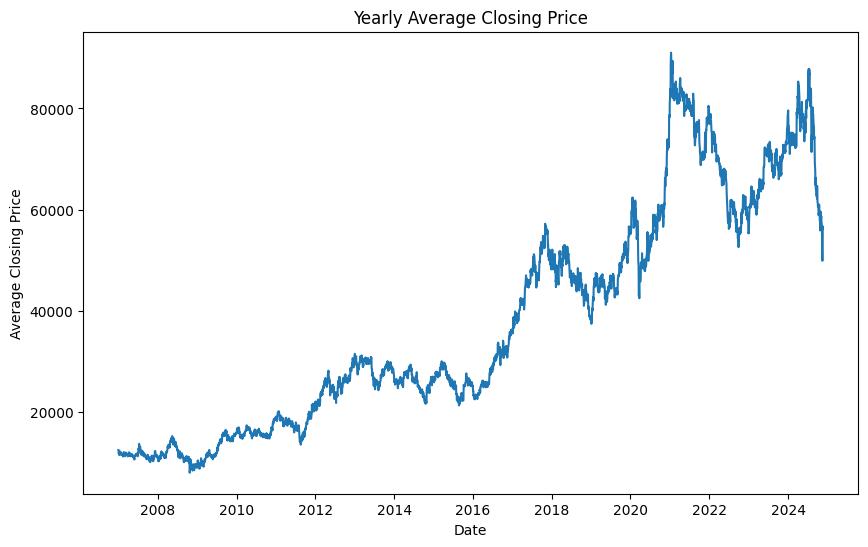

In [ ]:
yearly_avg = samsung_stock.groupby('Date')['Close'].mean()
plt.figure(figsize=(10, 6))
yearly_avg.plot()
plt.title('Yearly Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.show()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("StockAnalysis").getOrCreate()
samsung_stock_df = spark.read.csv(csv_path, header=True, inferSchema=True)

print(type(samsung_stock_df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
samsung_stock_df.show()

+----------+---------------+-------+-------+-------+-------+--------+
|       _c0|      Adj Close|  Close|   High|    Low|   Open|  Volume|
+----------+---------------+-------+-------+-------+-------+--------+
|2007-01-02|9109.5927734375|12520.0|12540.0|12320.0|12400.0|17607300|
|2007-01-03| 8934.966796875|12280.0|12560.0|12220.0|12540.0|19676500|
|2007-01-04| 8818.548828125|12120.0|12240.0|12060.0|12220.0|18258900|
|2007-01-05|8658.4775390625|11900.0|12180.0|11900.0|12160.0|28400400|
|2007-01-08| 8498.408203125|11680.0|11880.0|11580.0|11840.0|33081550|
|2007-01-09|8527.5087890625|11720.0|11880.0|11640.0|11740.0|20109850|
|2007-01-10| 8411.091796875|11560.0|11680.0|11500.0|11640.0|25756300|
|2007-01-11|8483.8525390625|11660.0|11760.0|11560.0|11580.0|29839350|
|2007-01-12| 8818.548828125|12120.0|12120.0|11700.0|11800.0|40346050|
|2007-01-15|8905.8603515625|12240.0|12300.0|12140.0|12240.0|33675300|
|2007-01-16| 8920.412109375|12260.0|12300.0|12220.0|12300.0|15522550|
|2007-01-17|8760.340

In [ ]:
from pyspark.sql.functions import to_date, col

In [ ]:
#samsung_stock_df = samsung_stock_df.withColumn("Date", to_date(col("Date"), "yyyy-MM-dd"))
samsung_df = samsung_stock_df.select((col("_c0")))
samsung_df.show()

+----------+
|       _c0|
+----------+
|2007-01-02|
|2007-01-03|
|2007-01-04|
|2007-01-05|
|2007-01-08|
|2007-01-09|
|2007-01-10|
|2007-01-11|
|2007-01-12|
|2007-01-15|
|2007-01-16|
|2007-01-17|
|2007-01-18|
|2007-01-19|
|2007-01-22|
|2007-01-23|
|2007-01-24|
|2007-01-25|
|2007-01-26|
|2007-01-29|
+----------+
only showing top 20 rows



In [ ]:
samsung_stock_df = samsung_stock_df.withColumn("Date", to_date(col("_c0"), "yyyy-MM-dd"))

 filters the dataset to include only stock data between March 1, 2020, and March 1, 2021, covering the early COVID-19 pandemic period.

In [ ]:
pandemic_df = samsung_stock_df.filter((col('Date') >= '2020-03-01') & (col('Date') <= '2021-03-01'))

PySpark DataFrames into Pandas DataFrames for easier analysis and visualization using Pandas.

In [ ]:
samsung_stock_pd = samsung_stock_df.toPandas()
pandemic_pd = pandemic_df.toPandas()

Plotting Stock Prices During the Pandemic Period

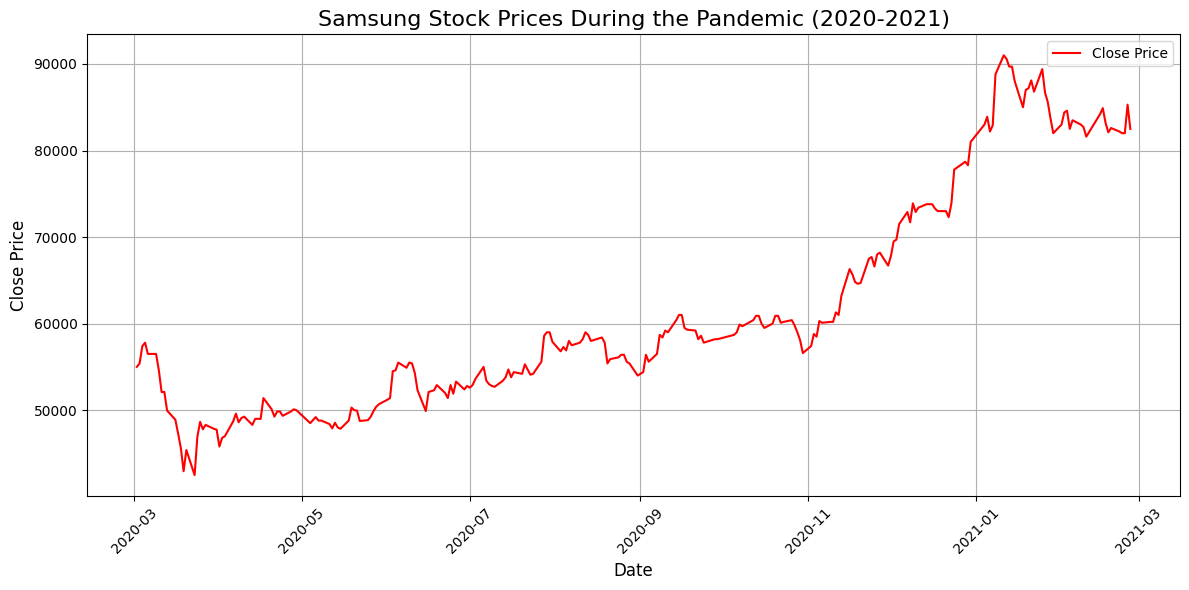

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pandemic_pd['Date'], pandemic_pd['Close'], label='Close Price', color='red')
plt.title('Samsung Stock Prices During the Pandemic (2020-2021)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Plotting the Stock Volume During the Pandemic

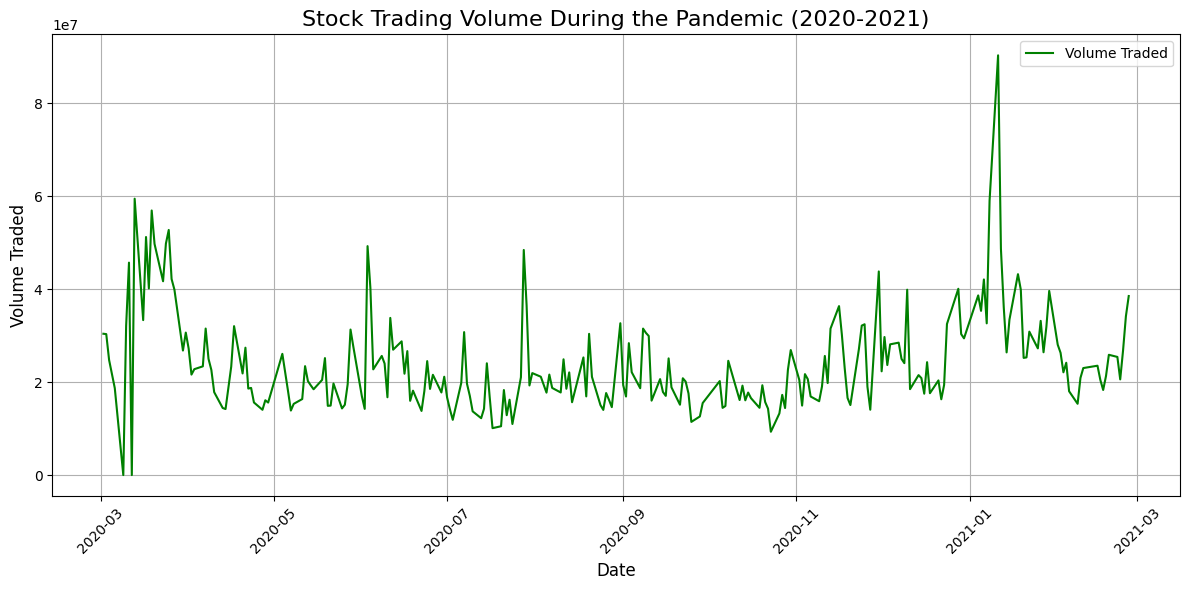

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pandemic_pd['Date'], pandemic_pd['Volume'], label='Volume Traded', color='green')
plt.title('Stock Trading Volume During the Pandemic (2020-2021)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume Traded', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

 Generating a Report in Graphical Format

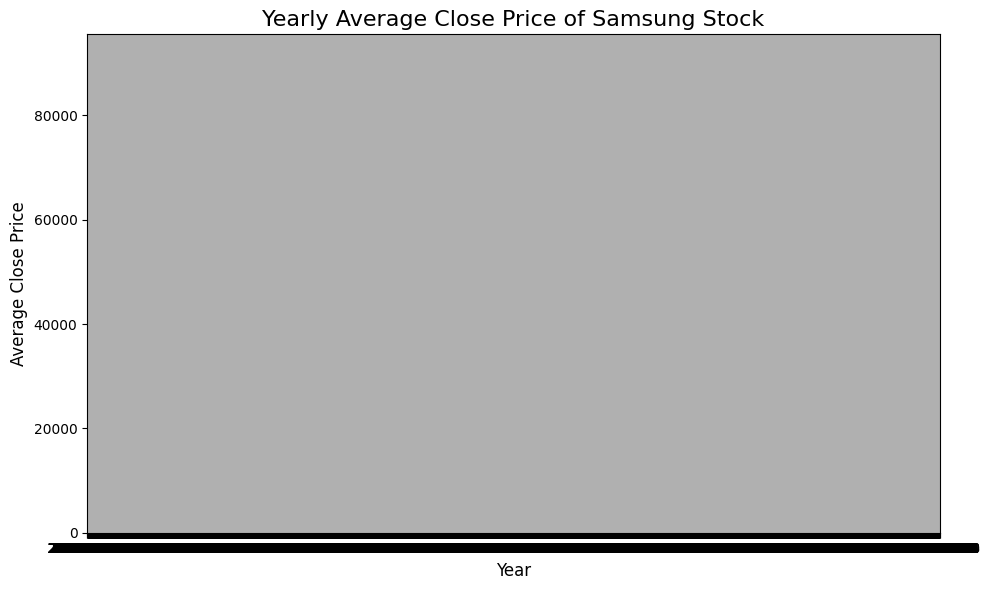

In [ ]:
yearly_avg_plot_path = "yearly_avg_stock_prices.png"
plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='bar', color='skyblue')
plt.title('Yearly Average Close Price of Samsung Stock', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Close Price', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.savefig(yearly_avg_plot_path)

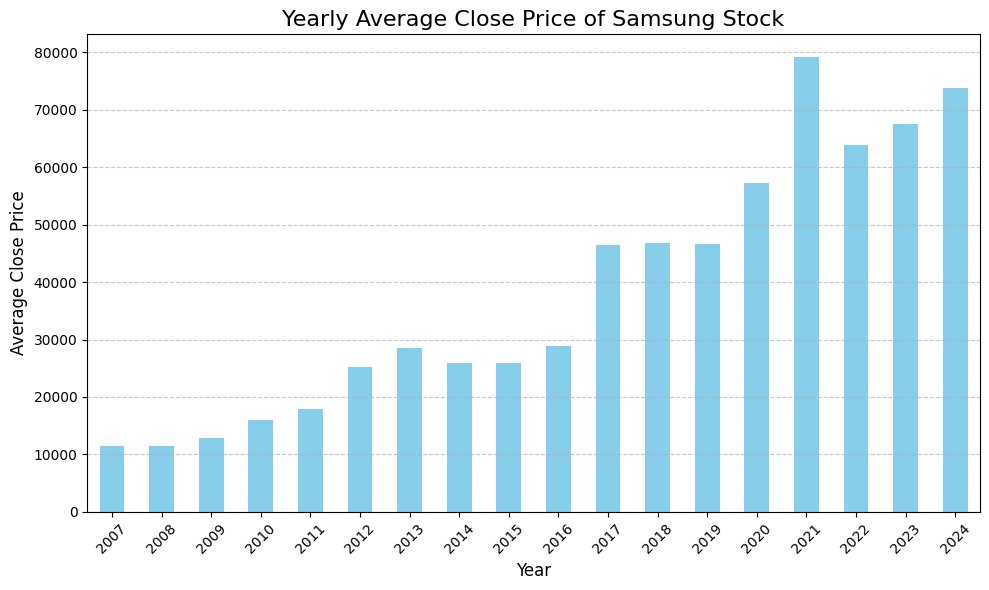

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
samsung_stock_pd['Date'] = pd.to_datetime(samsung_stock_pd['Date'])


yearly_avg = samsung_stock_pd.groupby(samsung_stock_pd['Date'].dt.year)['Close'].mean()


plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='bar', color='skyblue')
plt.title('Yearly Average Close Price of Samsung Stock', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Close Price', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and Show
plt.savefig("yearly_avg_stock_prices.png", dpi=300)  # High resolution
plt.show()

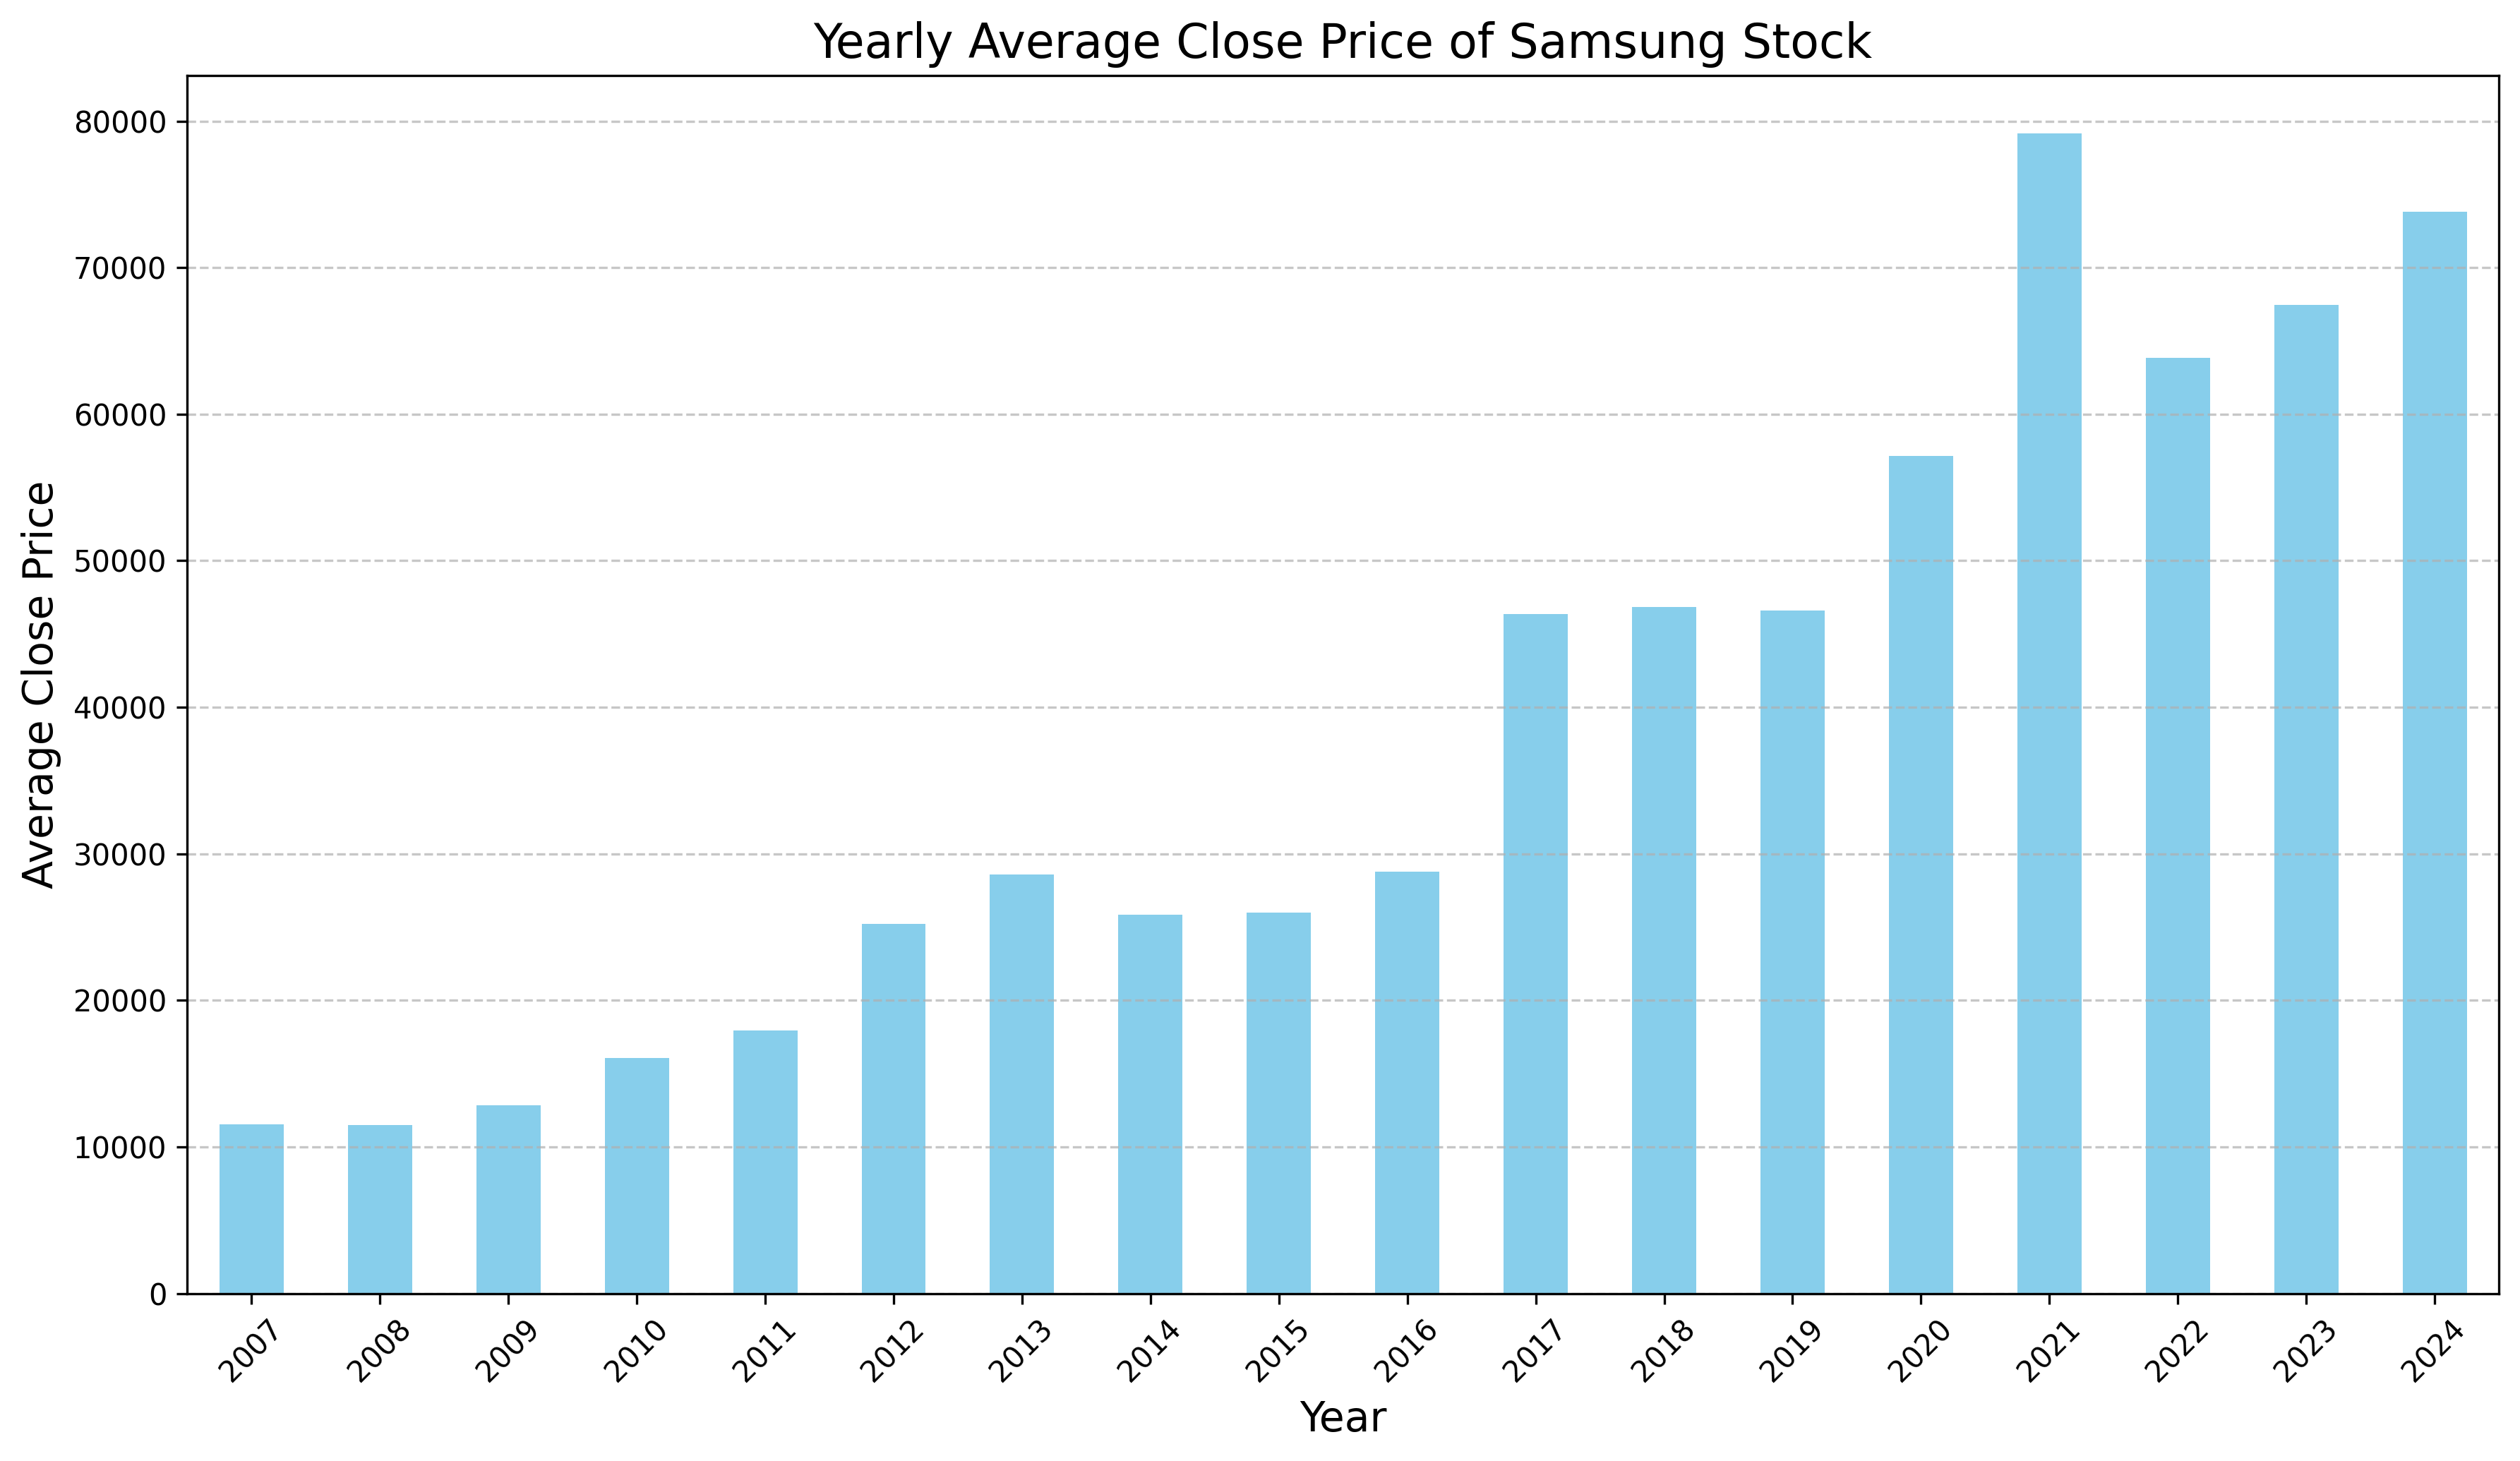

In [ ]:
plt.figure(figsize=(12, 7), dpi=300)  # Larger and higher resolution
yearly_avg.plot(kind='bar', color='skyblue')

plt.title('Yearly Average Close Price of Samsung Stock', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Close Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(yearly_avg_plot_path, dpi=300)
plt.show()


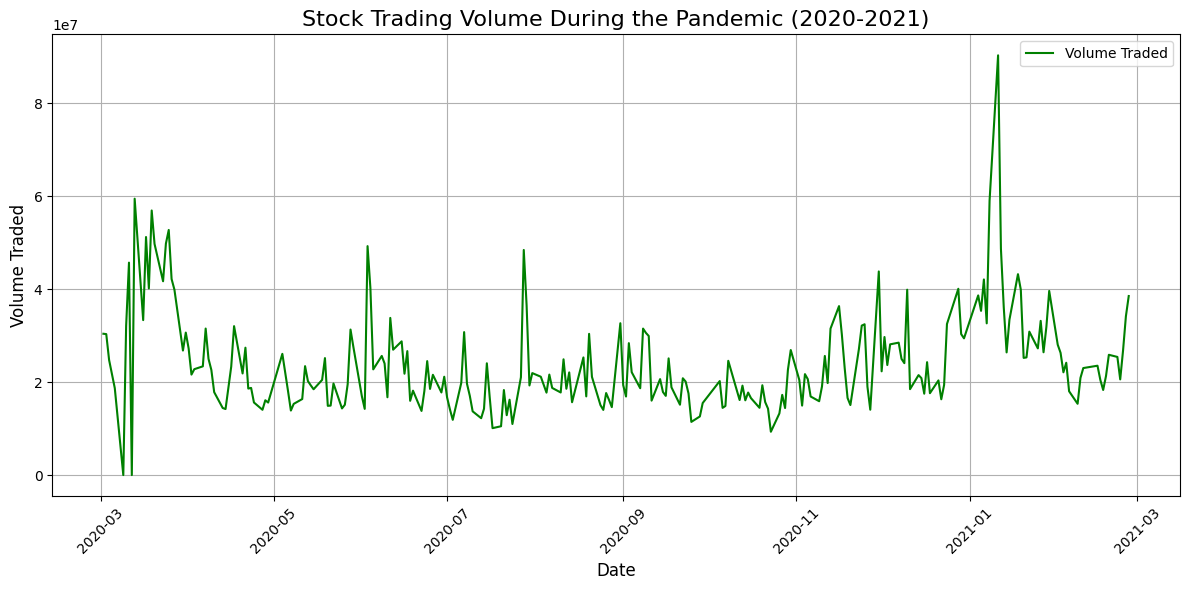

In [ ]:
pandemic_volume_plot_path = "pandemic_trading_volume.png"
plt.figure(figsize=(12, 6))
plt.plot(pandemic_pd['Date'], pandemic_pd['Volume'], label='Volume Traded', color='green')
plt.title('Stock Trading Volume During the Pandemic (2020-2021)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume Traded', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig(pandemic_volume_plot_path)